In [1]:
#imports
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:/MS/Spring23/Info Nw Sec/Project/fake_job_postings.csv')
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
#Show datatype
data.dtypes.to_frame()

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [4]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:>

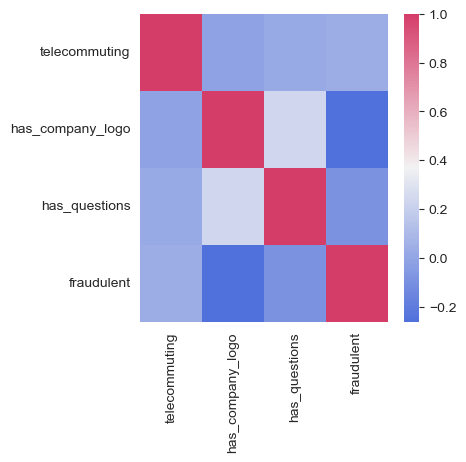

In [26]:
#Generate a heat map 

plt.figure(figsize = (4,4))
corr = data.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True))

In [7]:
#Removing undesired columns & nan 
data.function.fillna(data.department,inplace=True)
data.drop(columns=['job_id','salary_range','department'],inplace=True)

In [8]:
#Now handling the missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

#filling nan in categorical data
categ_cols=data[categ].fillna('None')

#filling nan in text data
txt_cols=data[text].fillna(' ')


categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()

In [23]:
#toal of Real and Fake Jobs in the dataset

data['fraudulent'].value_counts().to_frame()

,fraudulent
0,17014
1,866


([<matplotlib.patches.Wedge at 0x2c8ce183730>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

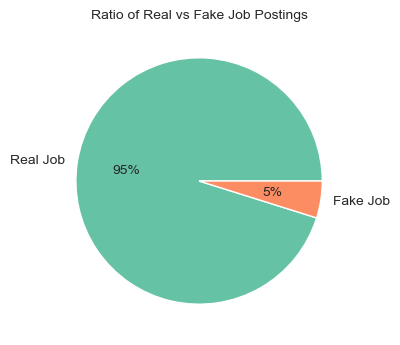

In [24]:
#Plotting the ratio of in pie-chart

colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(6,4))
plt.title('Ratio of Real vs Fake Job Postings',size=10)
sns.set_style('whitegrid')

#plotting pie-chart
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

Text(0.5, 0, 'Function')

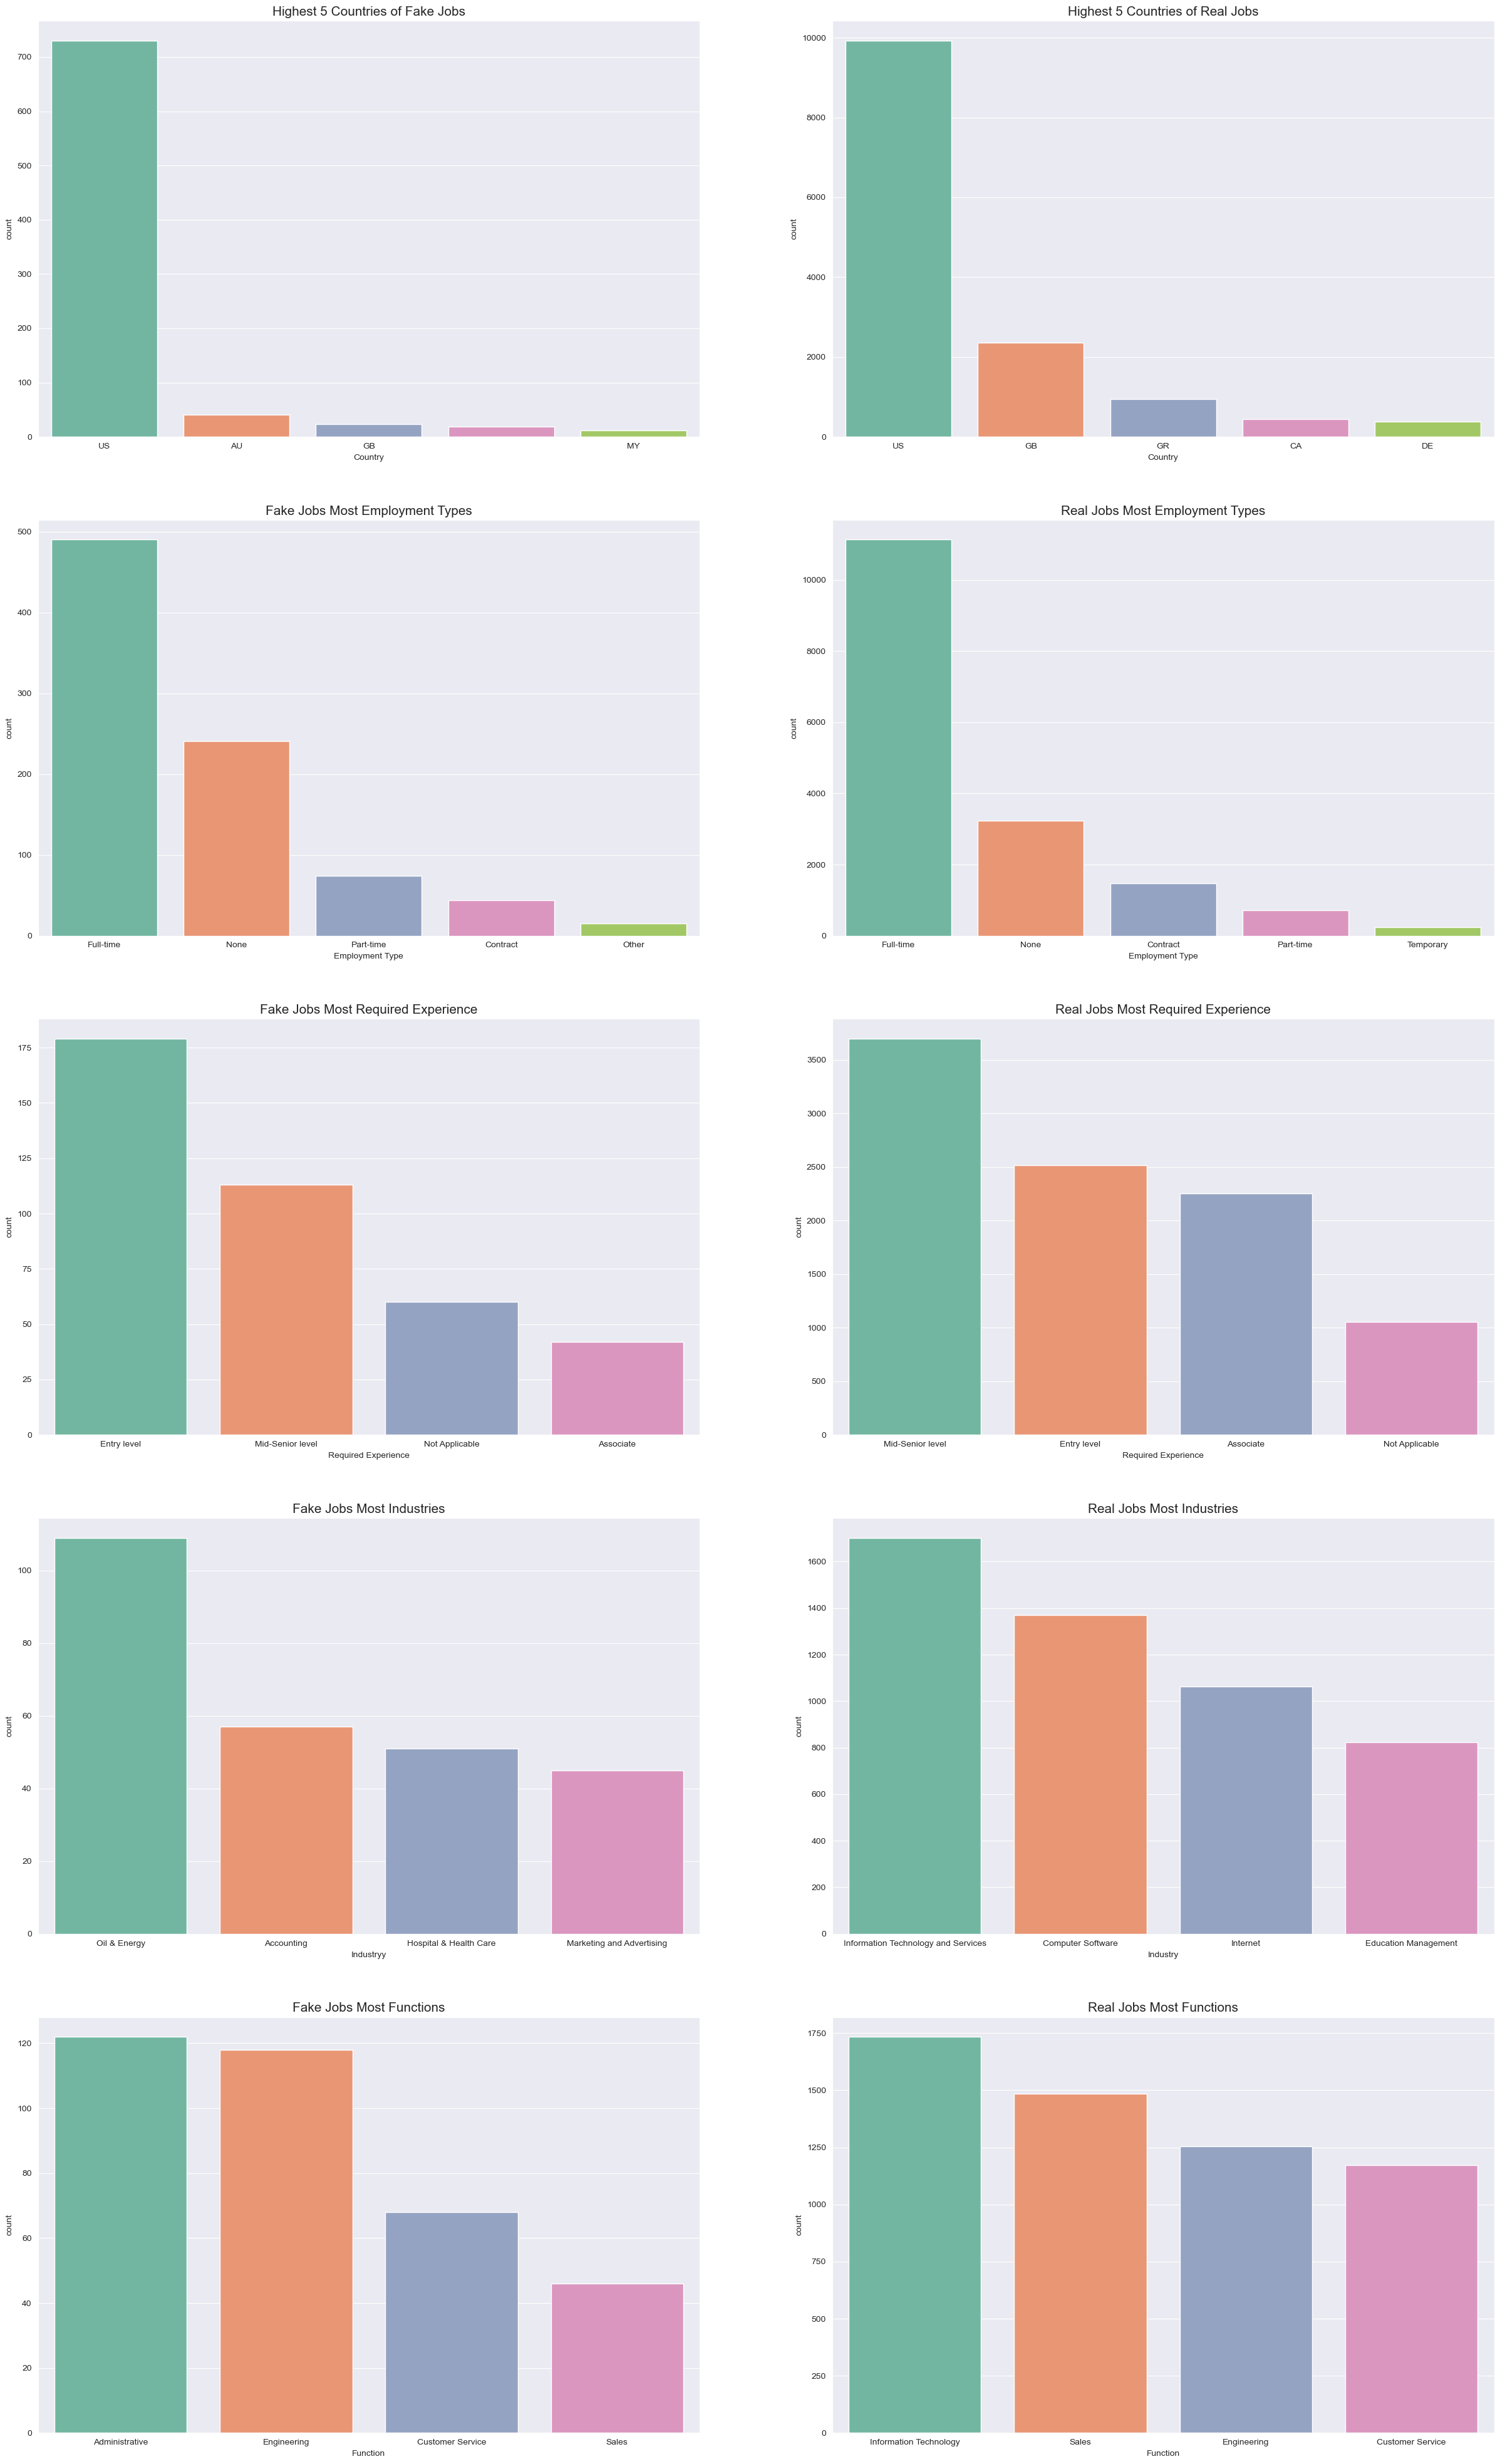

In [11]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]
sns.set_style('darkgrid')
fig,axes=plt.subplots(5,2,figsize=(30,50))

# Highest 5 Countries of Real/Fake Jobs
sns.countplot(fakejobs['country'],palette='Set2',order = fakejobs['country'].value_counts()[:5].index,ax=axes[0,0])
sns.countplot(realjobs['country'],palette='Set2',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

# Real/Fake Jobs Most Employment Types
sns.countplot(fakejobs['employment_type'],palette='Set2',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(realjobs['employment_type'],palette='Set2',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')

# Real/ Fake Jobs Most Required Experience
sns.countplot(fakejobs['required_experience'],palette='Set2',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(realjobs['required_experience'],palette='Set2',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

#Real/ Fake Jobs Most Industries
sns.countplot(fakejobs['industry'],palette='Set2',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(realjobs['industry'],palette='Set2',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

#Real/Fake Jobs Most Functions
sns.countplot(fakejobs['function'],palette='Set2',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(realjobs['function'],palette='Set2',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')


Text(0.5, 0, '')

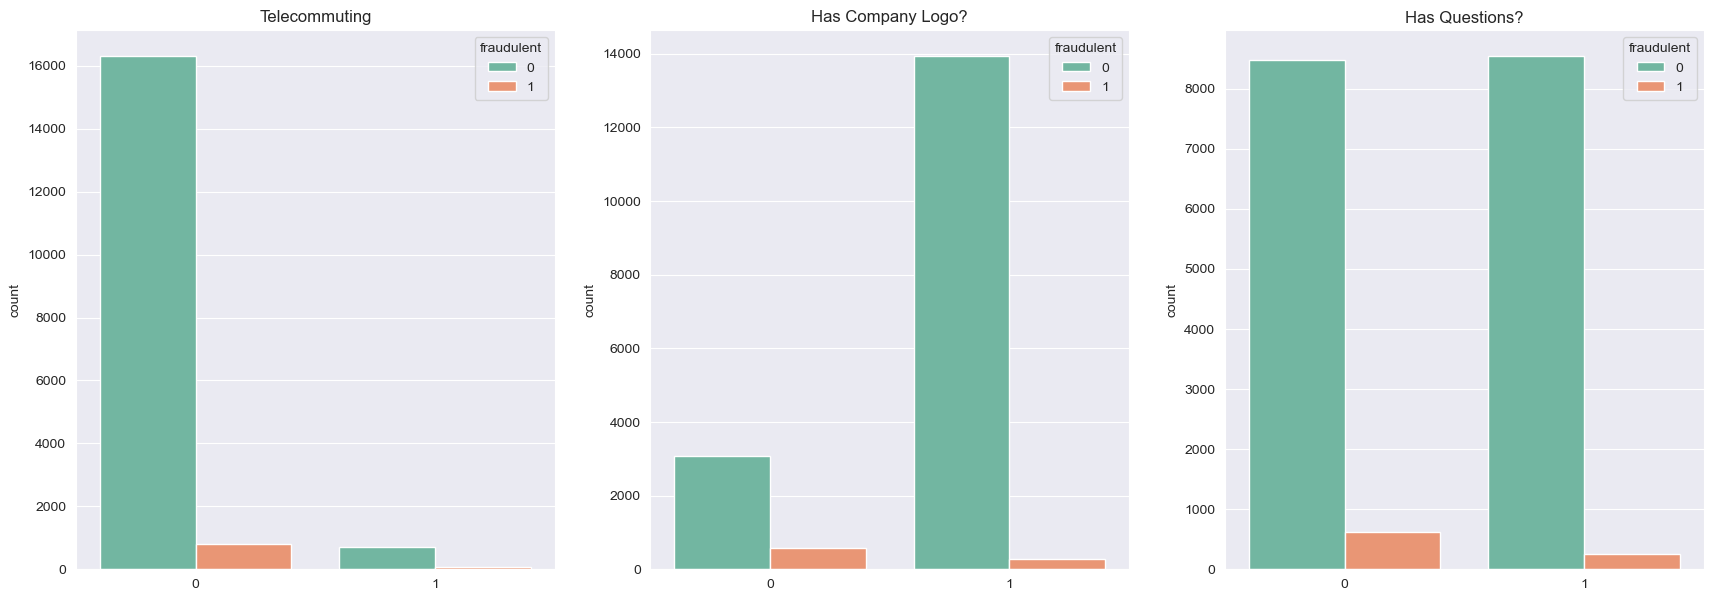

In [12]:
#Plotting list of jobs based on top list of categories

fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[0]) 
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[1]) 
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[2]) 

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Has Company Logo?',fontsize=12)
axes[2].set_title('Has Questions?',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
